**Imporations**

In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [22]:
# Charger le fichier audio
audio_file = "Chords_generation\chords_wav\A#maj.wav"
y, sr = librosa.load(audio_file)

# Extraire le nom du fichier (y compris l'extension)
file_name_with_extension = os.path.basename("Chords_generation\chords_wav\A#maj.wav")

# Séparer le nom du fichier de son extension
file_name, file_extension = os.path.splitext(file_name_with_extension)



audio_file2 = "Chords_generation\chords_wav\C#maj.wav"
y2, sr2 = librosa.load(audio_file2)

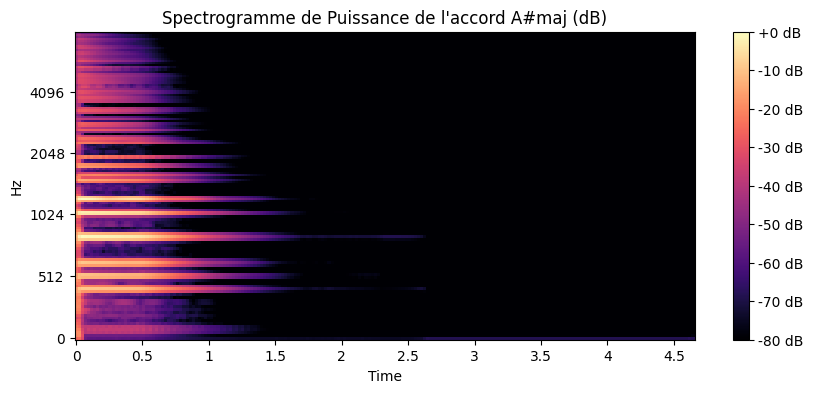

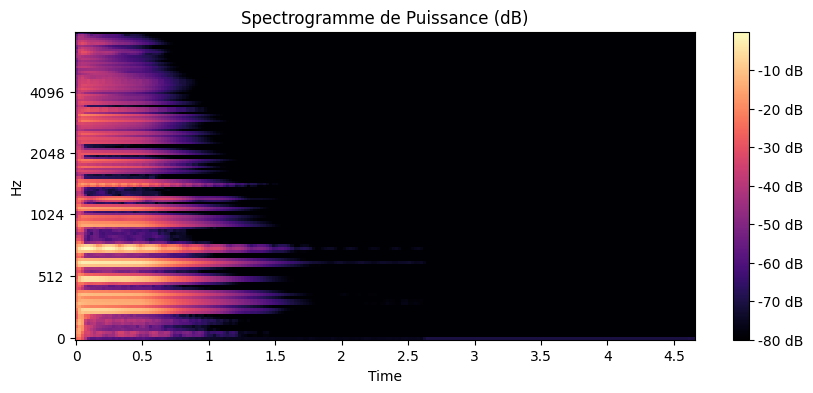

In [23]:
# Extraire le spectre de puissance (puissance des fréquences) au fil du temps
power = librosa.feature.melspectrogram(y=y, sr=sr)

# Convertir le spectre de puissance en décibels (dB)
power_db = librosa.power_to_db(power, ref=np.max)

# Afficher le spectrogramme de puissance en dB
plt.figure(figsize=(10, 4))
librosa.display.specshow(power_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogramme de Puissance de l'accord %s (dB)" %(file_name))
plt.show()

# Extraire le spectre de puissance (puissance des fréquences) au fil du temps
power = librosa.feature.melspectrogram(y=y2, sr=sr2)

# Convertir le spectre de puissance en décibels (dB)
power_db = librosa.power_to_db(power, ref=np.max)

# Afficher le spectrogramme de puissance en dB
plt.figure(figsize=(10, 4))
librosa.display.specshow(power_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de Puissance (dB)')
plt.show()

In [24]:
# Caractériser le son en fréquences
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_mean = np.mean(chroma, axis=1)